# AMAZON PRODUCT REVIEW ANALYSIS CAPSTONE PROJECT

## import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import svm
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import itertools
import datetime as dt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score

In [6]:
magzine=pd.read_csv('magzine_cleandata22.csv')#read data

In [7]:
magzine.head() #top five

,Unnamed: 0.1,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,style,category,title,also_buy,brand,also_view,main_cat,Review,polarity,Sentiment
0,0,0,3,False,2007-03-24,A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,antique magazine publication antique lover his...,0.131140,Positive
1,1,2,5,False,2006-11-10,A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,beautiful magazine work art quality page bit i...,0.783333,Positive
2,2,4,5,True,2015-08-23,A2T0GO5G3JJ66V,B00005N7OJ,Helen C. Kuzmier,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,magazine work artgreat photography superb inte...,0.562500,Positive
3,3,6,3,True,2015-03-10,A1CEG4HICKGHUW,B00005N7OJ,Cliffton K. Bryner,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,ok star,0.500000,Positive
4,4,8,3,True,2015-01-04,AJW4UJUSJVKJA,B00005N7OJ,Christine Moran,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,nice look way highbrow not renew subscription ...,0.533333,Positive


In [8]:
magzine.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)# drop unnamed column

In [9]:
magzine.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,style,category,title,also_buy,brand,also_view,main_cat,Review,polarity,Sentiment
0,3,False,2007-03-24,A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,antique magazine publication antique lover his...,0.13114,Positive


In [10]:
magzine2 = magzine[["Sentiment","Review"]]
magzine2.groupby('Sentiment').describe()

Review                                                            \
           count unique                                                top   
Sentiment                                                                    
Negative    4823   4747  grandchild get magazine cricket ladybug stage ...   
Neutral     6949   5335                                     greatfive star   
Positive   36795  34046                            great magazinefive star   

                
          freq  
Sentiment       
Negative     6  
Neutral    240  
Positive   324

In [11]:
magzine.shape

(48568, 16)

In [62]:
magzine.isnull().sum() #check null value

overall         0
verified        0
reviewTime      0
reviewerID      0
asin            0
reviewerName    0
style           0
category        0
title           0
also_buy        0
brand           0
also_view       0
main_cat        0
Review          0
polarity        0
Sentiment       0
dtype: int64

In [13]:
magzine.dropna(inplace=True)#drop null value

In [14]:
magzine.dtypes#check datatypes

overall           int64
verified           bool
reviewTime       object
reviewerID       object
asin             object
reviewerName     object
style            object
category         object
title            object
also_buy         object
brand            object
also_view        object
main_cat         object
Review           object
polarity        float64
Sentiment        object
dtype: object

# Classification

## Sentiment classification is the automated process of identifying and classifying emotions in text as positive sentiment, negative sentiment, or neutral sentiment based on the opinions expressed within.

## - CountVectorizer-->CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach)

## - TF-IDF Vectorizer --> TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus

In [15]:
df=magzine[['Sentiment','Review']]
df.head(1)

,Sentiment,Review
0,Positive,antique magazine publication antique lover his...


##### Train/Test Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(magzine['Review'], magzine['Sentiment'], random_state=42)
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (36424,)
y_train shape: (36424,)

x_test shape: (12142,)
y_test shape: (12142,)



In [54]:
print(y_train)

8718     Positive
9679     Positive
43112    Positive
58867    Positive
67187    Positive
           ...   
37196     Neutral
6265     Positive
54890    Positive
860      Positive
15795    Positive
Name: Sentiment, Length: 51704, dtype: object


### CountVectorizer with Multinomial Naive Bayes

In [18]:
df['Sentiment']=df['Sentiment'].astype(str)
df['Review']=df['Review'].astype(str)

C:\Users\dell\AppData\Local\Temp\ipykernel_3488\1049144981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment']=df['Sentiment'].astype(str)
C:\Users\dell\AppData\Local\Temp\ipykernel_3488\1049144981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review']=df['Review'].astype(str)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], random_state=42)
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (36424,)
y_train shape: (36424,)

x_test shape: (12142,)
y_test shape: (12142,)



In [21]:
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<36424x7293 sparse matrix of type '<class 'numpy.int64'>'
	with 581502 stored elements in Compressed Sparse Row format>


In [22]:
X_test = vectorizer.transform(x_test)

In [23]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [24]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [25]:
# Evaluate the model on validaton set
predictions = mnb.predict(X_test)
modelEvaluation(predictions)


Accuracy on validation set: 0.8424

Classification report : 
               precision    recall  f1-score   support

    Negative       0.46      0.56      0.51      1199
     Neutral       0.87      0.64      0.74      1750
    Positive       0.90      0.92      0.91      9193

    accuracy                           0.84     12142
   macro avg       0.74      0.71      0.72     12142
weighted avg       0.85      0.84      0.84     12142


Confusion Matrix : 
 [[ 673   59  467]
 [ 124 1124  502]
 [ 658  103 8432]]


In [26]:
def get_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Accuracy Score on training set : ", metrics.accuracy_score(y_train, pred_train))
    print("Accuracy Score on test set : ", metrics.accuracy_score(y_test, pred_test))
    print("-------------------------------------------------------------")
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train,average='weighted'))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test,average='weighted'))
    print("-------------------------------------------------------------")
    print("F1 Score on training set : ", metrics.f1_score(y_train, pred_train,average='weighted'))
    print("F1 Score on test set : ", metrics.f1_score(y_test, pred_test,average='weighted'))
    print("-------------------------------------------------------------")
    print("Precision Score on training set : ", metrics.precision_score(y_train, pred_train,average='weighted'))
    print("Precision Score on test set : ", metrics.precision_score(y_test, pred_test,average='weighted'))

In [27]:
get_score(mnb)

Accuracy Score on training set :  0.8674225785196573
Accuracy Score on test set :  0.8424477021907428
-------------------------------------------------------------
Recall on training set :  0.8674225785196573
Recall on test set :  0.8424477021907428
-------------------------------------------------------------
F1 Score on training set :  0.86863466707104
F1 Score on test set :  0.8434807950247653
-------------------------------------------------------------
Precision Score on training set :  0.8737379386462557
Precision Score on test set :  0.8507311327530976


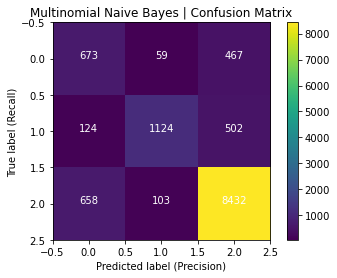

In [28]:
mnb_cfm = confusion_matrix(y_test, predictions)
plt.imshow(mnb_cfm, interpolation='nearest')

for i, j in itertools.product(range(mnb_cfm.shape[0]), range(mnb_cfm.shape[1])):
    plt.text(j, i, mnb_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial Naive Bayes | Confusion Matrix')
plt.colorbar();

## TfidfVectorizer with Multinomial Naive Bayes

In [29]:
# Vectorize X_train
vectorizer = TfidfVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))
X_test = vectorizer.transform(x_test)


X_train:
<36424x7293 sparse matrix of type '<class 'numpy.float64'>'
	with 581502 stored elements in Compressed Sparse Row format>


In [30]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [31]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [32]:
# Evaluate the model on validaton set
predictions = mnb.predict(X_test)
modelEvaluation(predictions)


Accuracy on validation set: 0.7972

Classification report : 
               precision    recall  f1-score   support

    Negative       0.65      0.09      0.15      1199
     Neutral       0.96      0.25      0.40      1750
    Positive       0.79      0.99      0.88      9193

    accuracy                           0.80     12142
   macro avg       0.80      0.44      0.48     12142
weighted avg       0.80      0.80      0.74     12142


Confusion Matrix : 
 [[ 104    7 1088]
 [   5  445 1300]
 [  50   12 9131]]


In [33]:
def get_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Accuracy Score on training set : ", metrics.accuracy_score(y_train, pred_train))
    print("Accuracy Score on test set : ", metrics.accuracy_score(y_test, pred_test))
    print("-------------------------------------------------------------")
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train,average='weighted'))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test,average='weighted'))
    print("-------------------------------------------------------------")
    print("F1 Score on training set : ", metrics.f1_score(y_train, pred_train,average='weighted'))
    print("F1 Score on test set : ", metrics.f1_score(y_test, pred_test,average='weighted'))
    print("-------------------------------------------------------------")
    print("Precision Score on training set : ", metrics.precision_score(y_train, pred_train,average='weighted'))
    print("Precision Score on test set : ", metrics.precision_score(y_test, pred_test,average='weighted'))

In [34]:
get_score(mnb)

Accuracy Score on training set :  0.8088622886009225
Accuracy Score on test set :  0.7972327458408829
-------------------------------------------------------------
Recall on training set :  0.8088622886009225
Recall on test set :  0.7972327458408829
-------------------------------------------------------------
F1 Score on training set :  0.7601071491703337
F1 Score on test set :  0.7406271137263208
-------------------------------------------------------------
Precision Score on training set :  0.8269154711374217
Precision Score on test set :  0.80298092275337


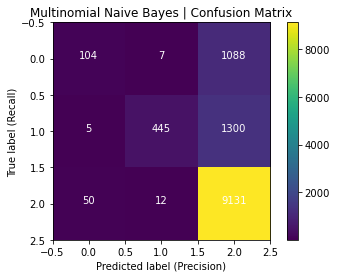

In [35]:
mnb_cfm = confusion_matrix(y_test, predictions)
plt.imshow(mnb_cfm, interpolation='nearest')

for i, j in itertools.product(range(mnb_cfm.shape[0]), range(mnb_cfm.shape[1])):
    plt.text(j, i, mnb_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial Naive Bayes | Confusion Matrix')
plt.colorbar();

## CountVectorizer with Logistic Regression

In [47]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)
# Logistic Regression
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Evaluate the model on validaton set
predictions = lr1.predict(X_test)
modelEvaluation(predictions)


Accuracy on validation set: 0.9335

Classification report : 
               precision    recall  f1-score   support

    Negative       0.77      0.64      0.70      1199
     Neutral       0.89      0.96      0.92      1750
    Positive       0.96      0.97      0.96      9193

    accuracy                           0.93     12142
   macro avg       0.87      0.86      0.86     12142
weighted avg       0.93      0.93      0.93     12142


Confusion Matrix : 
 [[ 767  111  321]
 [  18 1685   47]
 [ 210  100 8883]]


In [49]:
get_score(lr1)

Accuracy Score on training set :  0.9794366351855919
Accuracy Score on test set :  0.9335364849283478
-------------------------------------------------------------
Recall on training set :  0.9794366351855919
Recall on test set :  0.9335364849283478
-------------------------------------------------------------
F1 Score on training set :  0.9791398034633781
F1 Score on test set :  0.9315523316518189
-------------------------------------------------------------
Precision Score on training set :  0.9792111170790022
Precision Score on test set :  0.9312147398849854


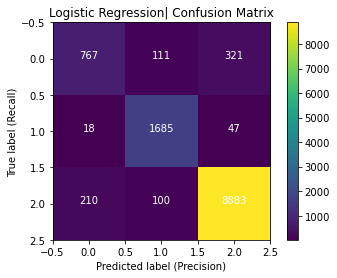

In [50]:
lr_cfm = confusion_matrix(y_test, predictions)
plt.imshow(lr_cfm, interpolation='nearest')

for i, j in itertools.product(range(lr_cfm.shape[0]), range(lr_cfm.shape[1])):
    plt.text(j, i, lr_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Regression| Confusion Matrix')
plt.colorbar();

## TfidfVectorizer with Logistic Regression

In [40]:
# Vectorize X_train
vectorizer = TfidfVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))
X_test = vectorizer.transform(x_test)


X_train:
<36424x7293 sparse matrix of type '<class 'numpy.float64'>'
	with 581502 stored elements in Compressed Sparse Row format>


In [41]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# Evaluate the model on validaton set
predictions = lr.predict(X_test)
modelEvaluation(predictions)


Accuracy on validation set: 0.9190

Classification report : 
               precision    recall  f1-score   support

    Negative       0.82      0.52      0.64      1199
     Neutral       0.91      0.86      0.89      1750
    Positive       0.93      0.98      0.95      9193

    accuracy                           0.92     12142
   macro avg       0.89      0.79      0.83     12142
weighted avg       0.92      0.92      0.91     12142


Confusion Matrix : 
 [[ 627   86  486]
 [  24 1512  214]
 [ 110   63 9020]]


In [43]:
get_score(lr)

Accuracy Score on training set :  0.9491269492642214
Accuracy Score on test set :  0.9190413440948773
-------------------------------------------------------------
Recall on training set :  0.9491269492642214
Recall on test set :  0.9190413440948773
-------------------------------------------------------------
F1 Score on training set :  0.9464294082799452
F1 Score on test set :  0.9131304000963418
-------------------------------------------------------------
Precision Score on training set :  0.9480644297760941
Precision Score on test set :  0.9151576424330907


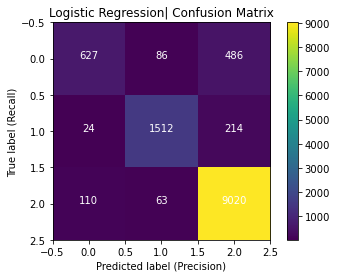

In [44]:
lr_cfm = confusion_matrix(y_test, predictions)
plt.imshow(lr_cfm, interpolation='nearest')

for i, j in itertools.product(range(lr_cfm.shape[0]), range(lr_cfm.shape[1])):
    plt.text(j, i, lr_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Regression| Confusion Matrix')
plt.colorbar();

## Create data frame for compare model

- CVMNB-->CountVectorizer with Multinomial Naive Bayes
- TFIDMNB-->TfidfVectorizer with Multinomial Naive Bayes
- CVLR-->CountVectorizer with Logistic Regression
- TFIDLR-->TfidfVectorizer with Logistic Regression

In [45]:
Accuracy=[84.24,79.72,93.35,91.90]
F1Score=[84.34,74.06,93.15,91.37]
Model=['CVMNB','TFIDMNB','CVLR','TFIDLR']
dictt={'Model':Model,"Accuracy":Accuracy,"F1-Score":F1Score}
df1=pd.DataFrame(dictt)

In [46]:
df1

,Model,Accuracy,F1-Score
0,CVMNB,84.24,84.34
1,TFIDMNB,79.72,74.06
2,CVLR,93.35,93.15
3,TFIDLR,91.90,91.37


## CVLR and TFIDLR both have good accuracy and f1score, not much difference between but CVLR have highest Accuracy and F1-Score.So we can use CVLR model for Sentiment prediction

### Predictions for unseen review using Classification model

## positive

In [55]:
lr1.predict(vectorizer.transform(['magazine work artgreat photography superb interesting article highly educational love ithelen kuzmiera gem']))

array(['Positive'], dtype=object)

## Negative

In [54]:
lr1.predict(vectorizer.transform([' disappointment pay add think articles family handyman topic I ve disappoint magazine I ve get amazon bern huge disappointmentwhat disappointment pay add']))

array(['Negative'], dtype=object)

## Neutral

In [56]:
lr1.predict(vectorizer.transform([' find reading inspirationalfive star ']))

array(['Neutral'], dtype=object)

In [238]:
beauty.columns

Index(['asin', 'title', 'overall', 'brand', 'rank', 'verified', 'reviewerID',
       'reviewerName', 'reviewTime', 'price', 'style', 'also_buy', 'also_view',
       'main_cat', 'Review', 'polarity', 'Sentiment'],
      dtype='object')

# Clustring

## Clustering is the task of dividing the unlabeled data or data points into different clusters such that similar data points fall in the same cluster than those which differ from the others. In simple words, the aim of the clustering process is to segregate groups with similar traits and assign them into clusters.

# K-means 

## K-means clustering is a type of unsupervised machine learning algorithm used to group data points or observations into K different clusters based on their similarities. The K in K-means represents the number of clusters that the algorithm will identify. The algorithm works by randomly assigning data points to one of K clusters, computing the centroid of each cluster, and then reassigning data points to the nearest centroid. This process is repeated iteratively until the clusters no longer change significantly or until a maximum number of iterations is reached. K-means is commonly used in a variety of fields, including image processing, natural language processing, and customer segmentation.

In [65]:
df2.isnull().sum()

overall       0
Review        0
brand         0
reviewerID    0
asin          0
Sentiment     0
dtype: int64

In [96]:
df2=magzine[['overall','Review','brand','reviewerID','asin','Sentiment']]

In [97]:
df2

,overall,Review,brand,reviewerID,asin,Sentiment
0,3,antique magazine publication antique lover his...,Brant Publications,A3JPFWKS83R49V,B00005N7OJ,Positive
1,5,beautiful magazine work art quality page bit i...,Brant Publications,A19FKU6JZQ2ECJ,B00005N7OJ,Positive
2,5,magazine work artgreat photography superb inte...,Brant Publications,A2T0GO5G3JJ66V,B00005N7OJ,Positive
3,3,ok star,Brant Publications,A1CEG4HICKGHUW,B00005N7OJ,Positive
4,3,nice look way highbrow not renew subscription ...,Brant Publications,AJW4UJUSJVKJA,B00005N7OJ,Positive
...,...,...,...,...,...,...
48563,4,love godly inspire thought prayer wish monthly...,Unity School of Christianity,A1FV4XJ0N7D8JB,B01ED5CQUO,Positive
48564,5,enjoyedfive star,Conde Nast,AVLFPNGUOE11W,B01ET8LMLO,Neutral
48565,2,like idea brad pitt like person gq change arti...,Conde Nast,AR000BA3H6ENJ,B01ET8LMLO,Positive
48566,5,designer constantly look good menswear magazin...,Conde Nast,A2UYDQ82TR6BWM,B01ET8LMLO,Positive


In [98]:

#Apply TfidfVectorizer to review text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [99]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=5)
tf_idf_vect.fit(df2['Review'])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*100)

tf_idf = tf_idf_vect.transform(df2['Review'])
#Normalize Data
#tf_idf_pre = preprocessing.normalize(tf_idf)

print("the type of count vectorizer ",type(tf_idf))
print("the shape of out text TFIDF vectorizer ",tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", tf_idf.get_shape()[1])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


some sample features(unique words in the corpus) ['aaafive', 'aaafive star', 'ab', 'aback', 'abandon', 'abbreviate', 'ability', 'ability read', 'able', 'able access']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (48566, 30658)
the number of unique words including both unigrams and bigrams  30658


In [100]:
k_values = [3,4,5,6]
loss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i).fit(tf_idf)
    loss.append(kmeans.inertia_)


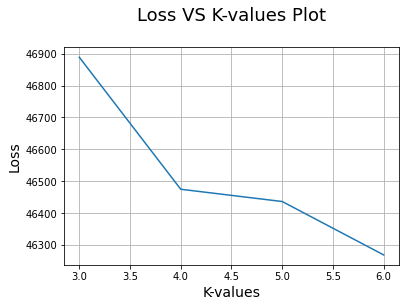

In [101]:
#Draw Loss VS K values plot
plt.plot(k_values, loss)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid(True)
plt.show()

In [102]:
# Choose the optimal value of k using silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(tf_idf)
    silhouette_scores.append(silhouette_score(tf_idf, kmeans.labels_))
print(silhouette_scores)    
    

[0.01196043220017769, 0.015154926379499802, 0.00934006694886895]


In [103]:
kmeans = KMeans(n_clusters=4).fit(tf_idf)

In [104]:
reviews = df2['Review'].values

#Getting all the reviews in different clusters
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []


for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster0.append(reviews[i])
    elif kmeans.labels_[i] == 1:
        cluster1.append(reviews[i])
    elif kmeans.labels_[i] == 2:
        cluster2.append(reviews[i])
   
    else :
        cluster3.append(reviews[i]) 
        
#Number of reviews in different clusters
print("No. of reviews in Cluster-0 : ",len(cluster0))
print("\nNo. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))


No. of reviews in Cluster-0 :  16276

No. of reviews in Cluster-1 :  2404

No. of reviews in Cluster-2 :  552

No. of reviews in Cluster-3 :  29334


## Wordclouds of clusters obtained after applying k-means

Cluster 0:

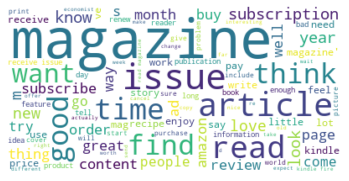

Cluster 1:

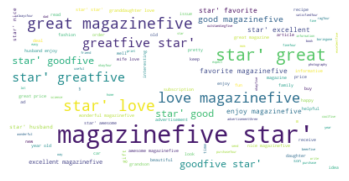

Cluster 2:

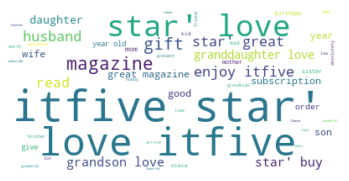

Cluster 3:

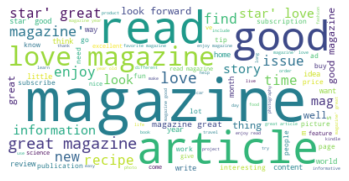

In [105]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

list= [cluster0, cluster1, cluster2, cluster3]

count=1
for i in range(4):
    print("Cluster %d:" % i, end='')
    count +=1
    wc = WordCloud(background_color="white", max_words=100)
    wc.generate(str(list[i]))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# RFM analysis

## RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

1. Recency: How recently customers made their purchase.
2. Frequency: For simplicity, we’ll count the number of times each customer made a purchase.
3. Monetary: How much money they spent in total.






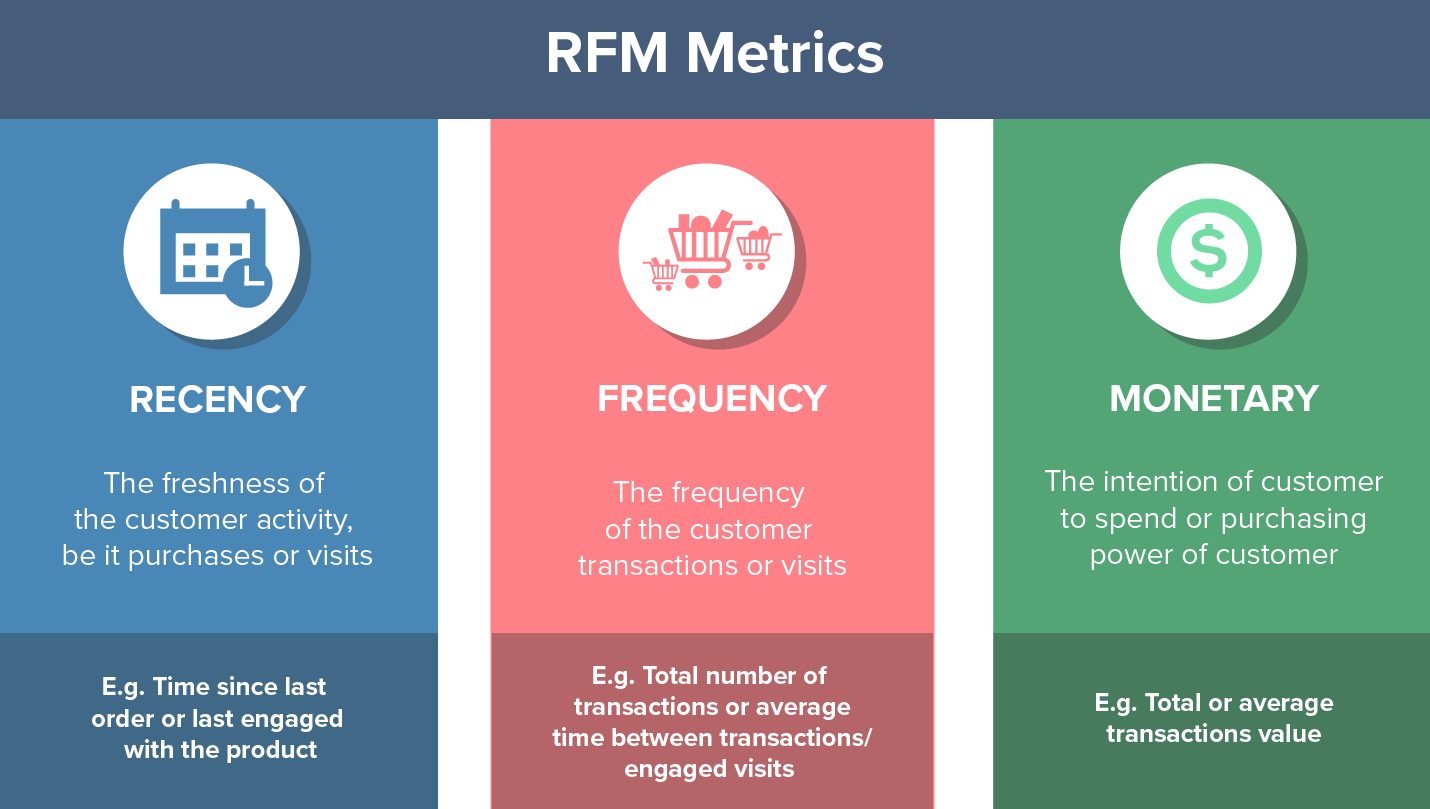







In [106]:
# Converting Date Format
magzine['reviewTime'] = pd.to_datetime(magzine['reviewTime'])

In [107]:
max_date = magzine['reviewTime'].max()
max_date

Timestamp('2018-09-13 00:00:00')

In [108]:
# Creating Date
end_date = dt.datetime(2018, 9, 14)

In [112]:
# Grouping the Data for RFM
data = magzine.groupby('reviewerID').agg({'reviewTime': lambda reviewTime: (end_date - reviewTime.max()).days,'asin' : 'nunique'})
     

In [ ]:
# Shape of Data
data.shape
     

In [ ]:
data.isnull().sum()

## Use of rating column

- we can use the rating column in RFM analysis even when the price column is not available. In this case, i would use the rating column as a substitute for the monetary value factor of the RFM analysis.
- Use this value as a proxy for the amount of money spent by the customer. i would then use the recency, frequency, and rating scores to segment our customers into groups based on their behavior and satisfaction.

In [113]:

new_data = magzine.groupby('reviewerID').agg({'overall': 'mean'})

In [114]:
# merge the new_data DataFrame with the data DataFrame on reviewerID
data = pd.merge(data, new_data, on='reviewerID', how='left')

In [115]:

# Assigning Columns
data.columns = ['recency','frequency','rating']
# Data Head
data.head()

,recency,frequency,rating
reviewerID,,,
A0068533X8Y5TYUJWWIC,1571,1,5.0
A0333047WGK24IZKLDP2,1450,1,4.0
A0534350D18UHJKPKZ1W,1154,1,5.0
A095896256EBDK3E42GW,1519,1,1.0
A1000EWBXBHK0P,1434,2,4.0


In [116]:
data.describe()

,recency,frequency,rating
count,42225.000000,42225.000000,42225.000000
mean,1636.078769,1.147282,4.011877
std,1158.194136,0.590298,1.425205
min,1.000000,1.000000,1.000000
25%,823.000000,1.000000,3.000000
50%,1404.000000,1.000000,5.000000
75%,2057.000000,1.000000,5.000000
max,6167.000000,31.000000,5.000000


In [118]:
# Scaling of Data
std = StandardScaler()
scaled_df = std.fit_transform(data)
# Creating DataFrame for Scaled Data
scaled_df = pd.DataFrame(scaled_df,columns=['recency','frequency','rating'], index=data.index)
scaled_df.head()

,recency,frequency,rating
reviewerID,,,
A0068533X8Y5TYUJWWIC,-0.056191,-0.249508,0.693328
A0333047WGK24IZKLDP2,-0.160665,-0.249508,-0.008334
A0534350D18UHJKPKZ1W,-0.416238,-0.249508,0.693328
A095896256EBDK3E42GW,-0.101089,-0.249508,-2.113319
A1000EWBXBHK0P,-0.174480,1.444570,-0.008334


In [119]:
scaled_df.isnull().sum()

recency      0
frequency    0
rating       0
dtype: int64

In [120]:

silhouette_scores = []
for k in range(4, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
print(silhouette_scores)    
    

[0.5104306754240626, 0.5346826578300785]


### k=5

In [121]:
# Model Building
model_1 = KMeans(n_clusters=5,random_state=42)

In [122]:
# Fitting Data
model_1.fit(scaled_df)
     

KMeans(n_clusters=5, random_state=42)

In [123]:
# Interpret the clusters
cluster_centers = pd.DataFrame(model_1.cluster_centers_)
print(cluster_centers)

          0         1         2
0  1.883068 -0.174281  0.251133
1 -0.113611 -0.206341 -1.619005
2 -0.367934 -0.249508  0.565713
3 -0.190885  9.248843  0.223890
4 -0.345841  1.962879  0.280310


In [124]:
# Cluster Labels
label_df = pd.DataFrame(model_1.labels_,columns=['labels'])
label_df.head()
     

,labels
0,2
1,2
2,2
3,1
4,4


In [125]:
# Adding Labels to Data Frame
scaled_df['labels'] = label_df['labels'].values
scaled_df.head()

,recency,frequency,rating,labels
reviewerID,,,,
A0068533X8Y5TYUJWWIC,-0.056191,-0.249508,0.693328,2
A0333047WGK24IZKLDP2,-0.160665,-0.249508,-0.008334,2
A0534350D18UHJKPKZ1W,-0.416238,-0.249508,0.693328,2
A095896256EBDK3E42GW,-0.101089,-0.249508,-2.113319,1
A1000EWBXBHK0P,-0.174480,1.444570,-0.008334,4


In [126]:
data['labels'] = label_df['labels'].values
data.head()

,recency,frequency,rating,labels
reviewerID,,,,
A0068533X8Y5TYUJWWIC,1571,1,5.0,2
A0333047WGK24IZKLDP2,1450,1,4.0,2
A0534350D18UHJKPKZ1W,1154,1,5.0,2
A095896256EBDK3E42GW,1519,1,1.0,1
A1000EWBXBHK0P,1434,2,4.0,4


In [130]:
reviews = df2['Review'].values
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster0.append(reviews[i])
    elif kmeans.labels_[i] == 1:
        cluster1.append(reviews[i])
    elif kmeans.labels_[i] == 2:
        cluster2.append(reviews[i])
    elif kmeans.labels_[i] == 3:
        cluster3.append(reviews[i])
    else :
        cluster4.append(reviews[i]) 
        
#Number of reviews in different clusters
print("No. of reviews in Cluster-0 : ",len(cluster0))
print("\nNo. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

No. of reviews in Cluster-0 :  5760

No. of reviews in Cluster-1 :  9612

No. of reviews in Cluster-2 :  23154

No. of reviews in Cluster-3 :  206

No. of reviews in Cluster-4 :  3493


In [131]:
cluster_means = data.groupby('labels').mean()
cluster_means

,recency,frequency,rating
labels,,,
0,3819.047396,1.044444,4.367332
1,1503.419892,1.025593,1.704605
2,1210.454954,1.000000,4.818066
3,1415.000000,6.606796,4.330962
4,1235.750644,2.306041,4.412062


In [134]:
# Define the cluster names based on the characteristics of each cluster
cluster_names = {
    0: "Satisfied but Infrequent Shoppers",
    1: "Dissatisfied and Infrequent Shoppers",
    2: "Highly Satisfied but Infrequent Shoppers",
    3: "Frequent and Loyal Shoppers",
    4: "Moderately Satisfied and Frequent Shoppers"
}

# Assign the cluster names to the DataFrame labels
data = cluster_means.rename(index=cluster_names)

data

,recency,frequency,rating
labels,,,
Satisfied but Infrequent Shoppers,3819.047396,1.044444,4.367332
Dissatisfied and Infrequent Shoppers,1503.419892,1.025593,1.704605
Highly Satisfied but Infrequent Shoppers,1210.454954,1.000000,4.818066
Frequent and Loyal Shoppers,1415.000000,6.606796,4.330962
Moderately Satisfied and Frequent Shoppers,1235.750644,2.306041,4.412062


##### To interpret the RFM analysis results for customer retention and identify strategies for improving retention, you can consider the following insights based on the provided DataFrame:

Satisfied but Infrequent Shoppers: These customers are highly satisfied with their purchases but don't shop frequently. To retain these customers, you can offer personalized promotions or discounts that encourage them to shop more frequently. You can also send targeted email campaigns or product recommendations to keep them engaged with your brand.

Dissatisfied and Infrequent Shoppers: These customers have low satisfaction and don't shop frequently. To improve retention for this group, you need to address the reasons for their dissatisfaction. You can reach out to these customers with personalized surveys or feedback forms to understand their concerns. Based on their feedback, you can make changes to your product or service offerings to address their needs.

Highly Satisfied but Infrequent Shoppers: These customers are highly satisfied with their purchases but don't shop frequently. Similar to the first group, you can retain these customers by offering personalized promotions or discounts that encourage them to shop more frequently. You can also send targeted email campaigns or product recommendations to keep them engaged with your brand.

Frequent and Loyal Shoppers: These customers are frequent shoppers and have high loyalty to your brand. To retain these customers, you can offer loyalty rewards or VIP programs that recognize and reward their loyalty. You can also send personalized communications or exclusive offers to keep them engaged and feeling valued.

Moderately Satisfied and Frequent Shoppers: These customers are moderately satisfied with their purchases and shop frequently. To improve retention for this group, you can focus on improving their satisfaction by offering more personalized and relevant product recommendations or customized offers. You can also offer incentives for them to refer friends or family to your brand, which can help to grow your customer base.

Overall, the key to improving customer retention is to understand the needs and preferences of each group of customers and to offer personalized experiences that meet their unique needs. By leveraging the insights gained from RFM analysis, you can develop targeted retention strategies that drive long-term customer loyalty and growth.

# Conclusion

## RFM analysis can provide valuable insights into customer behavior, and by segmenting customers into five distinct clusters, businesses can develop targeted retention strategies to improve customer satisfaction and loyalty, such as personalized promotions, loyalty rewards, and product recommendations.